## DBScan con datos geográficos


## 1- Cargamos librerías e importamos los datos



In [2]:
!pip install pandas

  Using cached https://files.pythonhosted.org/packages/34/40/c6eae19892551ff91bdb15f884fef2d42d6f58da55ab18fa540851b48a32/numpy-1.17.4-cp37-cp37m-win_amd64.whl


In [1]:
# import requests
import json
import pandas as pd
# import mplleaflet
# from multiprocessing import Pool

## Cargo el dataset de relevamiento de usos del suelo

In [2]:
df = pd.read_csv('http://cdn.buenosaires.gob.ar/datosabiertos/datasets/relevamiento-usos-del-suelo/relevamiento-usos-del-suelo-2017.csv')

In [3]:
df

,X,Y,SMP,CALLE,NUM,TIPO1_16,TIPO2_16,PISOS_16,NOMBRE,OBSERVACIO,BARRIO,COMUNA,5_DIG,4_DIG,3_DIG,2_DIG,RAMA,SUBRAMA,SSRAMA
0,-58.455634,-34.596891,047-040A-001C,MONTENEGRO,124,E,VIVIENDA,1,NaN,NaN,CHACARITA,15.0,3,0,0,0,EDIFICIOS,VIVIENDA,NaN
1,-58.455699,-34.596945,047-040A-002,NUEVA ZELANDIA,4820,EP,METALURGIA,1,RODOCA S.A.,NaN,CHACARITA,15.0,28900,2890,289,28,"FABRICACIÓN DE PRODUCTOS ELABORADOS DE METAL, ...",FABRICACIÓN DE PRODUCTOS ELABORADOS DE METAL NCP,NaN
2,-58.455750,-34.597013,047-040A-003,NUEVA ZELANDIA,4830,E,CASA,1,NaN,E X GAP,CHACARITA,15.0,4,0,0,0,EDIFICIOS,CASA,NaN
3,-58.455810,-34.597074,047-040A-004,NUEVA ZELANDIA,4840,GAP,GARAGE PRIVADO,1,NaN,NaN,CHACARITA,15.0,63312,6331,633,63,SERVICIOS COMPLEMENTARIOS AL TRANSPORTE,SERVICIOS COMPLEMENTARIOS AL TRANSPORTE TERRESTRE,"ESTACIONAMIENTOS, COCHERAS Y GARAJES"
4,-58.455879,-34.597129,047-040A-005,NUEVA ZELANDIA,4850,GAP,GARAGE PRIVADO,1,NaN,NaN,CHACARITA,15.0,63312,6331,633,63,SERVICIOS COMPLEMENTARIOS AL TRANSPORTE,SERVICIOS COMPLEMENTARIOS AL TRANSPORTE TERRESTRE,"ESTACIONAMIENTOS, COCHERAS Y GARAJES"
5,-58.455879,-34.597129,047-040A-005,NUEVA ZELANDIA,4850,E,CASA,2,NaN,NaN,CHACARITA,15.0,4,0,0,0,EDIFICIOS,CASA,NaN
6,-58.455942,-34.597185,047-040A-006,NUEVA ZELANDIA,4864,GAP,GARAGE PRIVADO,1,NaN,NaN,CHACARITA,15.0,63312,6331,633,63,SERVICIOS COMPLEMENTARIOS AL TRANSPORTE,SERVICIOS COMPLEMENTARIOS AL TRANSPORTE TERRESTRE,"ESTACIONAMIENTOS, COCHERAS Y GARAJES"
7,-58.455942,-34.597185,047-040A-006,NUEVA ZELANDIA,4864,E,OFICINAS,2,NaN,NaN,CHACARITA,15.0,1,0,0,0,EDIFICIOS,OFICINAS,NaN
8,-58.456017,-34.597341,047-040A-007A,NUEVA ZELANDIA,4880,U,UNIFICADO EDIFICIO,2,NaN,NaN,CHACARITA,15.0,31,0,0,0,UNIFICADO,UNIFICADO EDIFICIO,NaN
9,-58.456017,-34.597341,047-040A-007A,WARNES AV.,1431,L,ALARMAS PARA AUTOMOTORES (VENTA),2,NaN,NaN,CHACARITA,15.0,50300,5030,503,50,VENTA Y REP. DE VEHICULOS AUTOMOTORES,VENTA DE PARTES Y ACCESORIOS PARA AUTOMOTORES,NaN


## filtro comercios de interes

In [4]:
df['SSRAMA'][df['TIPO2_16']=='RESTAURANTE'].reset_index(drop=True).unique()

array(['RESTAURANT'], dtype=object)

In [5]:
restaurantes=df[df['TIPO2_16']=='RESTAURANTE'].reset_index(drop=True)

In [6]:
restaurantes=restaurantes[['X', 'Y','NOMBRE','BARRIO', 'COMUNA']]

In [7]:
restaurantes.shape

(1699, 5)

In [8]:
restaurantes['BARRIO'].value_counts()

PALERMO              301
SAN NICOLAS          174
BALVANERA            111
RECOLETA             108
BELGRANO             103
MONTSERRAT           100
CABALLITO             75
ALMAGRO               61
PUERTO MADERO         61
RETIRO                60
SAN TELMO             52
FLORES                39
VILLA CRESPO          39
VILLA URQUIZA         33
BARRACAS              32
VILLA DEVOTO          24
NUÑEZ                 23
SAN CRISTOBAL         20
PARQUE CHACABUCO      19
BOCA                  19
CONSTITUCION          18
BOEDO                 17
COLEGIALES            17
FLORESTA              16
MATADEROS             15
PARQUE PATRICIOS      15
NUEVA POMPEYA         14
LINIERS               14
CHACARITA             12
VILLA DEL PARQUE      11
VELEZ SARSFIELD       10
SAAVEDRA              10
VILLA ORTUZAR         10
VILLA SANTA RITA       8
VILLA GRAL. MITRE      7
PARQUE AVELLANEDA      7
VILLA LURO             6
PARQUE CHAS            6
COGHLAN                5
VILLA LUGANO           5


## 3- Visualizar los datos generados

Para visualizar los datos generados vamos a crear un GeoDataFrame utilizando la librería geopandas y vamos a mostrarlo en un mapa interactivo utilizando mplleaflet.

In [12]:
!pip install geopandas

    ERROR: Command errored out with exit status 1:
     command: 'C:\Users\Public\anacondanavigator\envs\especializacion\python.exe' -c 'import sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\FLIX~1\\AppData\\Local\\Temp\\pip-install-7f_1q1dg\\fiona\\setup.py'"'"'; __file__='"'"'C:\\Users\\FLIX~1\\AppData\\Local\\Temp\\pip-install-7f_1q1dg\\fiona\\setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__file__);code=f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' egg_info --egg-base 'C:\Users\FLIX~1\AppData\Local\Temp\pip-install-7f_1q1dg\fiona\pip-egg-info'
         cwd: C:\Users\FLIX~1\AppData\Local\Temp\pip-install-7f_1q1dg\fiona\
    Complete output (1 lines):
    A GDAL API version must be specified. Provide a path to gdal-config using a GDAL_CONFIG environment variable or use a GDAL_VERSION environment variable.
    ----------------------------------------
ERROR: Command errored out with exit status 1: python setup

In [9]:
from geopandas import GeoDataFrame
from shapely.geometry import Point

geometry = [Point(xy) for xy in zip(restaurantes.X, restaurantes.Y)]
crs = {'init': 'epsg:4326'}
gdf = GeoDataFrame(crs=crs, geometry=geometry)

In [10]:
gdf.crs = {'init' :'epsg:4326'}

In [16]:
import geopandas as gpd

In [17]:
comunas=gpd.read_file('comunas.shp')

In [20]:
comunas.crs = {'init' :'epsg:4326'}

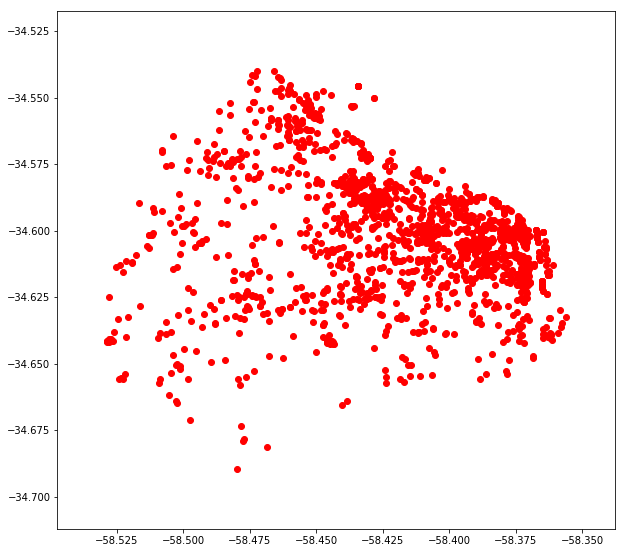

In [11]:
% matplotlib inline
import shapely
import matplotlib.pyplot as plt
ax1 = gdf.plot(color='r')
# comunas.plot(ax=ax1)

# ax1.set_xlim([-76.75, -76.5])
# ax1.set_ylim([-.2, 39.375])
fig = plt.gcf()
fig.set_size_inches(10, 10)

# ctx.add_basemap(ax1)
# mplleaflet.display()

In [13]:
gdf.to_csv('restaurantes_especializacion.csv')

## 4 -  Preprocesamiento de los datos geográficos

Hasta ahora tenemos la posición relativa de los bares expresada en grados de latitud y longitud.

Para que los parámetros del clustering DBScan tengan mayor sentido se puede transformar las medidas de latitud y longitud a una aproximación de los metros que representan con respecto al centro de los datos. Mientras que un grado de latitud siempre representa la misma distancia, un grado de longitud solamente es equivalente a uno de latitud, en metros, en la zona del ecuador. Por eso, es necesario hacer un ajuste para adaptarnos a la zona de estudio.



In [16]:
import numpy as np

In [17]:
# Primero centramos los datos
# distancia de cada observacion a la media
restaurantes['lat_center'] = restaurantes['X'] - np.mean(restaurantes['X']) 
# distancia de cada observacion a la media
restaurantes['lon_center'] = restaurantes['Y'] - np.mean(restaurantes['Y']) 

In [18]:
restaurantes.head()

,X,Y,NOMBRE,BARRIO,COMUNA,lat_center,lon_center
0,-58.453394,-34.587205,NaN,CHACARITA,15.0,-0.033495,0.013923
1,-58.452915,-34.587485,NaN,CHACARITA,15.0,-0.033016,0.013643
2,-58.453814,-34.596099,NaN,CHACARITA,15.0,-0.033915,0.005029
3,-58.446866,-34.591892,VICTORIA GOURMET,CHACARITA,15.0,-0.026968,0.009236
4,-58.446074,-34.590814,NaN,CHACARITA,15.0,-0.026176,0.010314


In [19]:
# Ahora funciones para pasar aproximadamente de grados a metros

In [20]:
def lat_a_metros(x):
    """Latitude:  1 grado = 110.54 km"""
    return x*110540

def lon_a_metros(x,cos_mean_lat):
    """Longitude: 1 grado = 111.320*cos(latitude) km"""
    return x*111320*cos_mean_lat


In [21]:
cos_m_lat = np.cos(np.deg2rad(np.mean(restaurantes['Y'])))
print(cos_m_lat)

0.8231251889616387


En la ciudad de bsas, cada milésima de grado de longitud equivale en distancia a 0.82 milésimas de grado de latitud.
Usamos esta medida de ajuste para calcular una medida que sirva para evaluar distancias en metros.

In [22]:
restaurantes['lat_metros'] = restaurantes['lat_center'].apply(lambda x: round(lat_a_metros(x)))

In [23]:
restaurantes['lon_metros'] = restaurantes['lon_center'].apply(lambda x: round(lon_a_metros(x,cos_m_lat)))

In [24]:
restaurantes.head()

,X,Y,NOMBRE,BARRIO,COMUNA,lat_center,lon_center,lat_metros,lon_metros
0,-58.453394,-34.587205,NaN,CHACARITA,15.0,-0.033495,0.013923,-3703,1276.0
1,-58.452915,-34.587485,NaN,CHACARITA,15.0,-0.033016,0.013643,-3650,1250.0
2,-58.453814,-34.596099,NaN,CHACARITA,15.0,-0.033915,0.005029,-3749,461.0
3,-58.446866,-34.591892,VICTORIA GOURMET,CHACARITA,15.0,-0.026968,0.009236,-2981,846.0
4,-58.446074,-34.590814,NaN,CHACARITA,15.0,-0.026176,0.010314,-2893,945.0


### 5- DBScan

Ahora podemos buscar las zonas de alta densidad de restaurantes a partir de alguna definición de negocio. Por ejemplo podemos proponer que hay una zona de alta densidad cuando se encuentran ininterrumpidamente 5 restaurantes en un radio de menos de 100 metros. 

In [25]:
# Zona de restaurantes: Al menos 10 restaurantes en un radio de 200 metros

In [26]:
from sklearn.cluster import DBSCAN, KMeans
dbscn = DBSCAN(eps = 200, min_samples = 10).fit(restaurantes[['lat_metros','lon_metros']])

In [27]:
dbscn

DBSCAN(algorithm='auto', eps=200, leaf_size=30, metric='euclidean',
    metric_params=None, min_samples=10, n_jobs=None, p=None)

In [28]:
labels = dbscn.labels_

In [29]:
len(pd.Series(labels).unique())

22

In [30]:
## El  -1 no es un cluster. Lo elimino cuando cuento los cluster. El -1 tiene asignado los restaurant q no pertenecen a un cluster
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

In [31]:
n_clusters_

21

Con estos parámetros encontramos 22 zonas de restaurantes en la ciudad para analizar. 

### 5.1 - Visualizar los resultados

Ahora veamos en el mapa las zonas obtenidas.

In [32]:
restaurantes['labels'] = labels

In [33]:
clusters = restaurantes.loc[restaurantes['labels']!=-1].copy()

In [48]:
clusters.sort_values('labels')

,X,Y,NOMBRE,BARRIO,COMUNA,lat_center,lon_center,lat_metros,lon_metros,labels
245,-58.446040,-34.641884,NaN,FLORES,7.0,-0.026142,-0.040756,-2890,-3734.0,0
680,-58.445343,-34.641490,NaN,PARQUE CHACABUCO,7.0,-0.025444,-0.040362,-2813,-3698.0,0
681,-58.445009,-34.641478,NaN,PARQUE CHACABUCO,7.0,-0.025110,-0.040350,-2776,-3697.0,0
682,-58.445986,-34.640743,NaN,PARQUE CHACABUCO,7.0,-0.026087,-0.039615,-2884,-3630.0,0
685,-58.443785,-34.641875,NaN,PARQUE CHACABUCO,7.0,-0.023887,-0.040747,-2640,-3734.0,0
687,-58.444388,-34.641527,SUSHI CLUB,PARQUE CHACABUCO,7.0,-0.024490,-0.040399,-2707,-3702.0,0
686,-58.444163,-34.641641,NaN,PARQUE CHACABUCO,7.0,-0.024264,-0.040513,-2682,-3712.0,0
246,-58.446077,-34.641801,NaN,FLORES,7.0,-0.026179,-0.040673,-2894,-3727.0,0
251,-58.443776,-34.642732,NaN,FLORES,7.0,-0.023877,-0.041604,-2639,-3812.0,0
250,-58.443387,-34.642444,NaN,FLORES,7.0,-0.023489,-0.041316,-2596,-3786.0,0


In [35]:
clusters

,X,Y,NOMBRE,BARRIO,COMUNA,lat_center,lon_center,lat_metros,lon_metros,labels
245,-58.446040,-34.641884,NaN,FLORES,7.0,-0.026142,-0.040756,-2890,-3734.0,0
246,-58.446077,-34.641801,NaN,FLORES,7.0,-0.026179,-0.040673,-2894,-3727.0,0
247,-58.445807,-34.642192,NaN,FLORES,7.0,-0.025908,-0.041064,-2864,-3763.0,0
249,-58.444719,-34.642762,NaN,FLORES,7.0,-0.024820,-0.041634,-2744,-3815.0,0
250,-58.443387,-34.642444,NaN,FLORES,7.0,-0.023489,-0.041316,-2596,-3786.0,0
251,-58.443776,-34.642732,NaN,FLORES,7.0,-0.023877,-0.041604,-2639,-3812.0,0
374,-58.372958,-34.616997,NaN,SAN TELMO,1.0,0.046940,-0.015869,5189,-1454.0,1
375,-58.373254,-34.616146,ABUELA PAN,SAN TELMO,1.0,0.046644,-0.015018,5156,-1376.0,1
376,-58.374296,-34.616175,NaN,SAN TELMO,1.0,0.045602,-0.015047,5041,-1379.0,1
377,-58.371171,-34.617008,NaN,SAN TELMO,1.0,0.048727,-0.015880,5386,-1455.0,1


A continuación armamos otro GeoDataFrame que contenga las posiciones y las labels de los restaurantes que fueron asignados a algún cluster.

In [36]:
geometry = [Point(xy) for xy in zip(clusters.X, clusters.Y)]
crs = {'init': 'epsg:4326'}
gdf = GeoDataFrame(clusters[['labels']],crs=crs, geometry=geometry)

In [37]:
gdf.head()

,labels,geometry
245,0,POINT (-58.4460404386109 -34.6418835545947)
246,0,POINT (-58.4460773215155 -34.6418013945581)
247,0,POINT (-58.4458065673116 -34.6421919323197)
249,0,POINT (-58.44471851292811 -34.64276177096031)
250,0,POINT (-58.44338704778029 -34.6424444019607)


In [38]:
gdf.to_csv('restaurantes_clusters.csv')

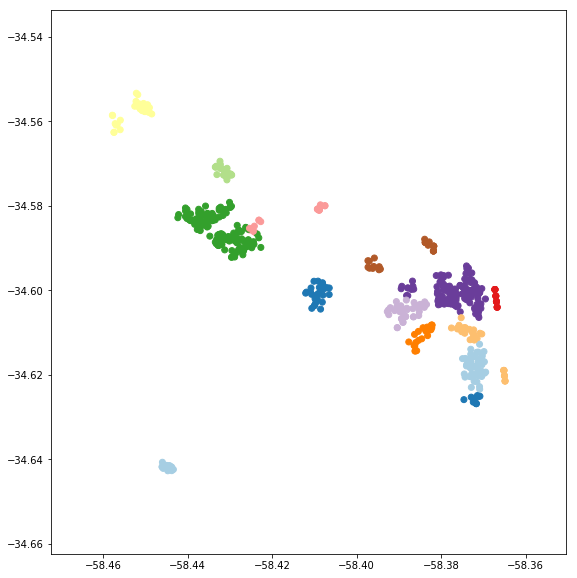

In [51]:
gdf.plot(column='labels', cmap='Paired');
fig = plt.gcf()
fig.set_size_inches(10, 10)
# mplleaflet.display()

Conclusión: En las zonas periféricas los clusters son bien marcados. En las zonas céntricas, los clusters se confunden un poco. Recordemos que DBScan es sensible a la diferencia general de densidad entre zonas. 